In [415]:
import kaggle
!kaggle competitions download -c playground-series-s3e22


  0%|          | 0.00/59.7k [00:00<?, ?B/s]
100%|██████████| 59.7k/59.7k [00:00<00:00, 232kB/s]
100%|██████████| 59.7k/59.7k [00:00<00:00, 231kB/s]


In [416]:
from zipfile import ZipFile
file_path = 'playground-series-s3e22.zip'
with ZipFile(file_path, 'r') as zip:
    zip.extractall()

In [417]:
import pandas as pd

In [418]:
train_df = pd.read_csv('train.csv')
train_df.head()

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [419]:
df = train_df.drop(columns=['id'], axis = 1)
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [420]:
df = df.drop(columns=['hospital_number'], axis=1)
for cols in df:
    print(cols, df[cols].dtype)

surgery object
age object
rectal_temp float64
pulse float64
respiratory_rate float64
temp_of_extremities object
peripheral_pulse object
mucous_membrane object
capillary_refill_time object
pain object
peristalsis object
abdominal_distention object
nasogastric_tube object
nasogastric_reflux object
nasogastric_reflux_ph float64
rectal_exam_feces object
abdomen object
packed_cell_volume float64
total_protein float64
abdomo_appearance object
abdomo_protein float64
surgical_lesion object
lesion_1 int64
lesion_2 int64
lesion_3 int64
cp_data object
outcome object


In [421]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1235 entries, 0 to 1234
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1235 non-null   object 
 1   age                    1235 non-null   object 
 2   rectal_temp            1235 non-null   float64
 3   pulse                  1235 non-null   float64
 4   respiratory_rate       1235 non-null   float64
 5   temp_of_extremities    1196 non-null   object 
 6   peripheral_pulse       1175 non-null   object 
 7   mucous_membrane        1214 non-null   object 
 8   capillary_refill_time  1229 non-null   object 
 9   pain                   1191 non-null   object 
 10  peristalsis            1215 non-null   object 
 11  abdominal_distention   1212 non-null   object 
 12  nasogastric_tube       1155 non-null   object 
 13  nasogastric_reflux     1214 non-null   object 
 14  nasogastric_reflux_ph  1235 non-null   float64
 15  rect

In [422]:
df.isna().sum()

surgery                    0
age                        0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities       39
peripheral_pulse          60
mucous_membrane           21
capillary_refill_time      6
pain                      44
peristalsis               20
abdominal_distention      23
nasogastric_tube          80
nasogastric_reflux        21
nasogastric_reflux_ph      0
rectal_exam_feces        190
abdomen                  213
packed_cell_volume         0
total_protein              0
abdomo_appearance         48
abdomo_protein             0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [423]:
numerical_columns = []
categorical_columns = []
for cols in df:
    if df[cols].dtype == 'object':
        categorical_columns.append(cols);
    else:
        numerical_columns.append(cols);

In [424]:
categorical_columns

['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'cp_data',
 'outcome']

In [425]:
numerical_columns

['rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1',
 'lesion_2',
 'lesion_3']

In [426]:
for col in df.columns:
    if col in categorical_columns:
        mode_value = df[col].mode()[0]  
        df[col].fillna(mode_value, inplace=True)  
    else:
        median_value = df[col].median()  
        df[col].fillna(median_value, inplace=True) 

In [427]:
df.isnull().sum()

surgery                  0
age                      0
rectal_temp              0
pulse                    0
respiratory_rate         0
temp_of_extremities      0
peripheral_pulse         0
mucous_membrane          0
capillary_refill_time    0
pain                     0
peristalsis              0
abdominal_distention     0
nasogastric_tube         0
nasogastric_reflux       0
nasogastric_reflux_ph    0
rectal_exam_feces        0
abdomen                  0
packed_cell_volume       0
total_protein            0
abdomo_appearance        0
abdomo_protein           0
surgical_lesion          0
lesion_1                 0
lesion_2                 0
lesion_3                 0
cp_data                  0
outcome                  0
dtype: int64

In [428]:
import matplotlib.pyplot as plt
import seaborn as sns

c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

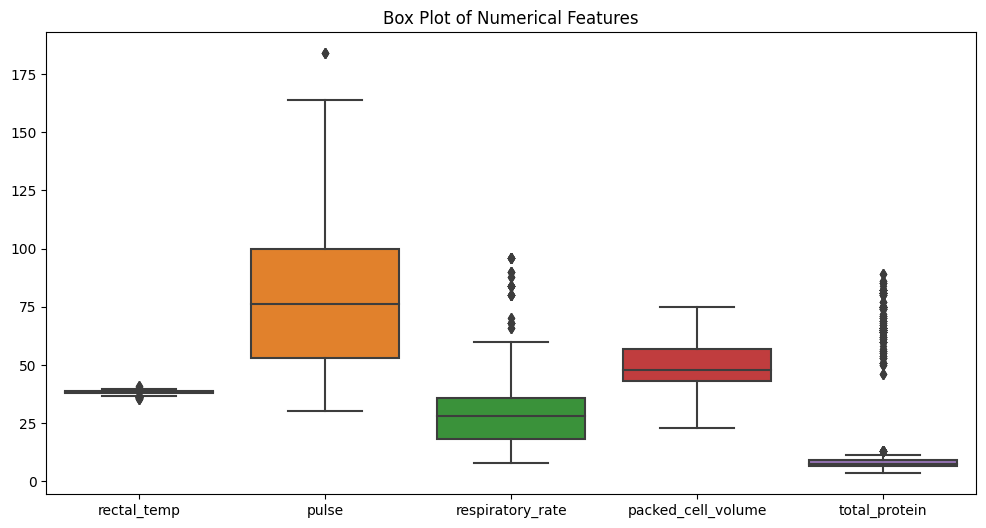

In [429]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']])
plt.title('Box Plot of Numerical Features')
plt.show()

c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

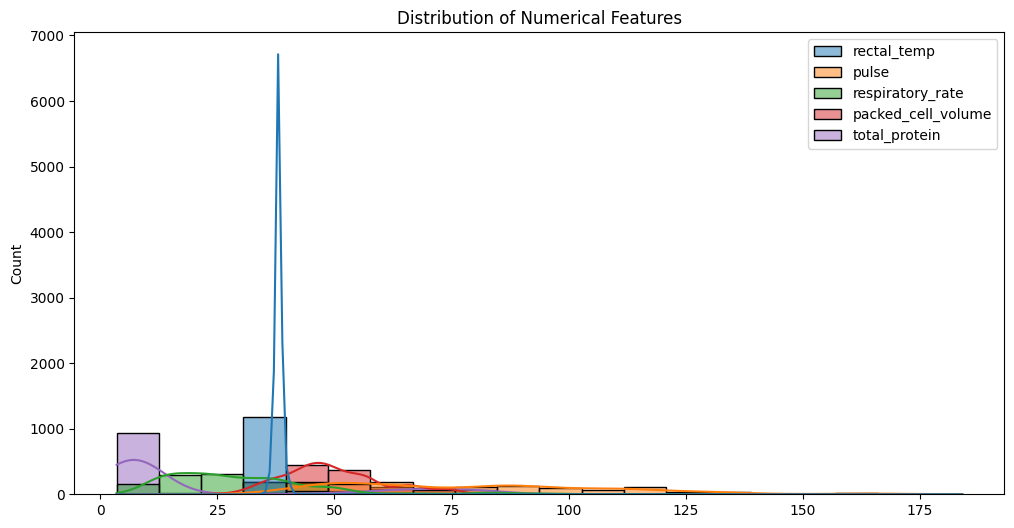

In [430]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df[['rectal_temp', 'pulse', 'respiratory_rate', 'packed_cell_volume', 'total_protein']], bins=20, kde=True)
plt.title('Distribution of Numerical Features')
plt.show()

c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: Fut

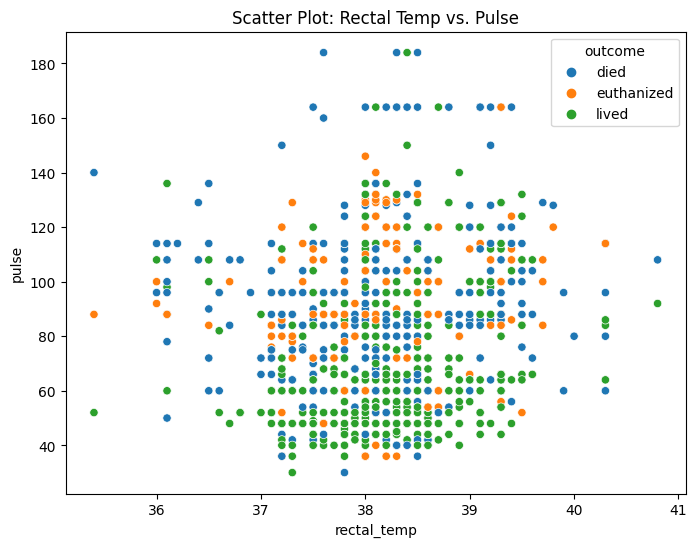

In [431]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='rectal_temp', y='pulse', hue='outcome')
plt.title('Scatter Plot: Rectal Temp vs. Pulse')
plt.show()

In [432]:
df['outcome'].replace({'died': 0, 'euthanized': 1, 'lived': 2}, inplace=True)
df['outcome']

0       0
1       1
2       2
3       2
4       2
       ..
1230    2
1231    0
1232    2
1233    2
1234    2
Name: outcome, Length: 1235, dtype: int64

In [433]:
X = df.drop(columns=['outcome'], axis = 1)
y = df['outcome']

In [434]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
categorical_features = ['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'cp_data']
numerical_features = ['rectal_temp',
 'pulse',
 'respiratory_rate',
 'nasogastric_reflux_ph',
 'packed_cell_volume',
 'total_protein',
 'abdomo_protein',
 'lesion_1',
 'lesion_2',
 'lesion_3']
ct = ColumnTransformer([
    ('OneHotEncoder', OneHotEncoder(), categorical_features),
    ('StandardScaling', StandardScaler(), numerical_features)
])
X = ct.fit_transform(X)

In [435]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting (XGBoost)': XGBClassifier(),
    'Gradient Boosting (LightGBM)': LGBMClassifier(),
    'Gradient Boosting (CatBoost)': CatBoostClassifier(),
    'Support Vector Machine (SVM)': SVC(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Ensemble': AdaBoostClassifier()
}

In [436]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_model(y_true, y_pred):
    acc_score = accuracy_score(y_true, y_pred)
    prec_score = precision_score(y_true, y_pred, average='weighted')
    rec_score = recall_score(y_true, y_pred, average='weighted')
    f_score = f1_score(y_true, y_pred, average='weighted')
    return acc_score, prec_score, rec_score, f_score

In [437]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model_name = list(models.keys())[i]
    model.fit(X, y)
    y_pred = model.predict(X)

c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\anshuman.kundu1\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\data.py:520: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(data):


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 1235, number of used features: 61
[LightGBM] [Info] Start training from score -1.102669
[LightGBM] [Info] Start training from score -1.593373
[LightGBM] [Info] Start training from score -0.766197
Learning rate set to 0.079983
0:	learn: 1.0588525	total: 5.91ms	remaining: 5.91s
1:	learn: 1.0214869	total: 10.3ms	remaining: 5.12s
2:	learn: 0.9935121	total: 14.6ms	remaining: 4.84s
3:	learn: 0.9639881	total: 18.5ms	remaining: 4.6s
4:	learn: 0.9426541	total: 22.2ms	remaining: 4.41s
5:	learn: 0.9213527	total: 26.3ms	remaining: 4.37s
6:	learn: 0.9033056	total: 49ms	remaining: 6.95s
7:	learn: 0.8852586	total: 52.5ms	remaining: 6.51s
8:	learn: 0.8690303	total: 56.1ms	remaining: 6.18s
9

In [438]:
best_model = RandomForestClassifier()
best_model.fit(X, y)

RandomForestClassifier()

In [439]:
import pickle
with open('best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model, model_file)